In [102]:
import pandas as pd
from selenium.webdriver import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

In [49]:
from utils import get_tickers_from_market_index

idiv = get_tickers_from_market_index("./assets/IDIV-composition.csv")

len(idiv)

51

In [50]:
tickers_code = [f"{ticker}.SA" for ticker in idiv]
tickers_code

['ABCB4.SA',
 'ALUP11.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BRSR6.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'AGRO3.SA',
 'CXSE3.SA',
 'CMIG3.SA',
 'CMIG4.SA',
 'CSMG3.SA',
 'CPLE3.SA',
 'CPLE6.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'DIRR3.SA',
 'EGIE3.SA',
 'FESA4.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GRND3.SA',
 'RANI3.SA',
 'ITSA4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KEPL3.SA',
 'KLBN11.SA',
 'LAVV3.SA',
 'MRFG3.SA',
 'LEVE3.SA',
 'BEEF3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PSSA3.SA',
 'RAPT4.SA',
 'ROMI3.SA',
 'SANB11.SA',
 'CSNA3.SA',
 'TAEE11.SA',
 'TASA4.SA',
 'TGMA3.SA',
 'VIVT3.SA',
 'TRPL4.SA',
 'TRIS3.SA',
 'UNIP6.SA',
 'USIM5.SA',
 'VALE3.SA',
 'WIZC3.SA']

## Obter os dados de dividendos

In [51]:
import yfinance as yf

tickers = yf.Tickers(tickers_code).tickers

In [52]:
all_dividends = pd.DataFrame()

for ticker, data in tickers.items():
    per_month_df = data.actions.groupby(pd.Grouper(freq="M")).sum()
    dividend_df = per_month_df.iloc[:, 0].to_frame()
    dividend_df.rename(columns={'Dividends': ticker}, inplace=True)

    if all_dividends.empty:
        all_dividends = dividend_df
        continue

    all_dividends = all_dividends.merge(dividend_df, left_index=True, right_index=True, how='outer')
    all_dividends.fillna(0, inplace=True)

all_dividends.reset_index(inplace=True)
all_dividends.set_index("Date", inplace=True)
all_dividends.index = pd.to_datetime(all_dividends.index)

all_dividends

,ABCB4.SA,ALUP11.SA,AURE3.SA,B3SA3.SA,BRSR6.SA,BBSE3.SA,BRAP4.SA,BBAS3.SA,AGRO3.SA,CXSE3.SA,...,TAEE11.SA,TASA4.SA,TGMA3.SA,VIVT3.SA,TRPL4.SA,TRIS3.SA,UNIP6.SA,USIM5.SA,VALE3.SA,WIZC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2000-04-30 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2000-05-31 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2000-06-30 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2000-07-31 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 00:00:00-03:00,0.0,0.12,0.0,0.00000,0.000000,1.607637,0.000000,0.668883,0.000000,0.0,...,0.909844,0.1,0.57,0.244259,0.000000,0.0,0.000000,0.0,1.918472,0.0
2023-09-30 00:00:00-03:00,0.0,0.00,0.0,0.10571,0.171625,0.000000,0.000000,0.334197,0.000000,0.0,...,0.000000,0.0,0.00,0.280702,0.000000,0.0,0.000000,0.0,0.000000,0.0
2023-10-31 00:00:00-03:00,0.0,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,3.212353,0.5,...,0.000000,0.0,0.00,0.090575,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [53]:
all_dividends.to_csv("./assets/idiv_companies_dividends.csv")

## ## Agrupamento com base no dividendo

Classificações:
- Dividendo alto
- Dividendo moderado
- Dividendo baixo

In [228]:
all_dividends = pd.read_csv("./assets/idiv_companies_dividends.csv")
all_dividends.set_index("Date", inplace=True)

In [229]:
import plotly.express as px

fig = px.line(all_dividends, x=all_dividends.index, y=all_dividends.columns[:5])
fig.update_layout(title="Dividendo das empresas listados em bolsa",
                  xaxis_title="Data",
                  yaxis_title="Valor")
fig.show()

In [230]:
total_dividend = all_dividends.sum().to_frame("Dividend")
total_dividend

,Dividend
ABCB4.SA,9.904649
ALUP11.SA,9.566915
AURE3.SA,3.086049
B3SA3.SA,4.244068
BRSR6.SA,11.863749
BBSE3.SA,21.857815
BRAP4.SA,27.939677
BBAS3.SA,27.964662
AGRO3.SA,15.832486
CXSE3.SA,1.903551


In [231]:
px.box(total_dividend)

In [232]:
import numpy as np

mean = np.mean(total_dividend.Dividend)
std_dev = np.std(total_dividend.Dividend)

lower_fence = mean - 1.5 * std_dev
upper_fence = mean + 1.5 * std_dev

outliers = total_dividend[(total_dividend.Dividend < lower_fence) | (total_dividend.Dividend > upper_fence)]

total_dividend.drop(outliers.index, inplace=True)
total_dividend.sort_values(by="Dividend", inplace=True)
total_dividend

,Dividend
TRIS3.SA,1.558536
CXSE3.SA,1.903551
LAVV3.SA,1.943683
CMIN3.SA,2.087090
RANI3.SA,2.567704
JHSF3.SA,2.662139
BEEF3.SA,3.011198
AURE3.SA,3.086049
RAPT4.SA,3.939864
KEPL3.SA,4.170099


In [233]:
total_dividend.describe()

,Dividend
count,50.000000
mean,14.041885
std,12.002644
min,1.558536
25%,5.319527
50%,10.547861
75%,20.335365
max,48.899306


In [234]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
total_dividend_scaled = scaller.fit_transform(total_dividend.to_numpy())
total_dividend_scaled

array([[-1.05060905],
       [-1.0215723 ],
       [-1.01819476],
       [-1.00612551],
       [-0.96567663],
       [-0.9577289 ],
       [-0.92835181],
       [-0.92205228],
       [-0.8501945 ],
       [-0.83081773],
       [-0.82459244],
       [-0.80879267],
       [-0.74004825],
       [-0.71617906],
       [-0.70698163],
       [-0.70407337],
       [-0.69792853],
       [-0.61630978],
       [-0.60072833],
       [-0.58623852],
       [-0.58134196],
       [-0.55886589],
       [-0.51244058],
       [-0.3766172 ],
       [-0.34819323],
       [-0.23992663],
       [-0.21227634],
       [-0.18331374],
       [-0.1815541 ],
       [-0.04195964],
       [-0.0400922 ],
       [ 0.02821063],
       [ 0.05081749],
       [ 0.0525406 ],
       [ 0.15069848],
       [ 0.22857586],
       [ 0.38546815],
       [ 0.57773004],
       [ 0.65779519],
       [ 0.74055289],
       [ 0.77980239],
       [ 1.15426979],
       [ 1.16964976],
       [ 1.17175252],
       [ 1.59992631],
       [ 1

In [235]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3, random_state=0)
cluster_model.fit(total_dividend_scaled)

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=0)

In [236]:
centers = cluster_model.cluster_centers_
centers = scaller.inverse_transform(centers).ravel()
centers = sorted(centers)
centers

[5.04451448, 16.086384875, 35.39991422222222]

In [237]:
import numpy as np

labels = cluster_model.labels_
np.unique(np.array(labels), return_counts=True)

(array([0, 1, 2], dtype=int32), array([16,  9, 25]))

In [238]:
import plotly.graph_objects as go

classification_legend = [
    "Dividendos Baixo",  # 0
    "Dividendos Moderado",  # 1
    "Dividendos Alto"  # 2
]

graph1 = px.scatter(total_dividend, x=total_dividend.index, y=total_dividend.columns, color=labels)
graph2 = px.scatter(x=classification_legend, y=centers, size=[12, 12, 12])
graph3 = go.Figure(data=graph1.data + graph2.data)
graph3.show()

In [239]:
classification = np.column_stack((total_dividend, labels))
classification_df = pd.DataFrame(classification, columns=["Dividend", "Classification"])

In [240]:
classified_all_dividends = pd.merge(total_dividend, classification_df, on="Dividend", how="left")
classified_all_dividends.index = total_dividend.index
classified_all_dividends.sort_values(by="Dividend", ascending=True)

,Dividend,Classification
TRIS3.SA,1.558536,2.0
CXSE3.SA,1.903551,2.0
LAVV3.SA,1.943683,2.0
CMIN3.SA,2.087090,2.0
RANI3.SA,2.567704,2.0
JHSF3.SA,2.662139,2.0
BEEF3.SA,3.011198,2.0
AURE3.SA,3.086049,2.0
RAPT4.SA,3.939864,2.0
KEPL3.SA,4.170099,2.0


In [241]:
possible_classifications = len(classification_legend)
classified_tickers = [[""]] * possible_classifications

for i in range(possible_classifications):
    filtered_df = classified_all_dividends[classified_all_dividends["Classification"] == i]
    classified_tickers[i] = filtered_df.index.to_list()

classified_tickers

[['TGMA3.SA',
  'CSMG3.SA',
  'BRSR6.SA',
  'CMIG4.SA',
  'CMIG3.SA',
  'PSSA3.SA',
  'CSNA3.SA',
  'FESA4.SA',
  'GGBR4.SA',
  'AGRO3.SA',
  'GOAU4.SA',
  'TRPL4.SA',
  'SANB11.SA',
  'BBSE3.SA',
  'CPFE3.SA',
  'LEVE3.SA'],
 ['EGIE3.SA',
  'BRAP4.SA',
  'BBAS3.SA',
  'TAEE11.SA',
  'UNIP6.SA',
  'PETR3.SA',
  'PETR4.SA',
  'VALE3.SA',
  'VIVT3.SA'],
 ['TRIS3.SA',
  'CXSE3.SA',
  'LAVV3.SA',
  'CMIN3.SA',
  'RANI3.SA',
  'JHSF3.SA',
  'BEEF3.SA',
  'AURE3.SA',
  'RAPT4.SA',
  'KEPL3.SA',
  'B3SA3.SA',
  'CPLE3.SA',
  'USIM5.SA',
  'GRND3.SA',
  'ITSA4.SA',
  'MRFG3.SA',
  'WIZC3.SA',
  'ROMI3.SA',
  'DIRR3.SA',
  'KLBN11.SA',
  'TASA4.SA',
  'JBSS3.SA',
  'FLRY3.SA',
  'ALUP11.SA',
  'ABCB4.SA']]

## Definir um CAP (Carrying capacity) médio em cada categoria de empresa pagadora de dividendos

In [242]:
cap_per_cluster = {
    classification: 0.0
    for classification in range(possible_classifications)
}

all_dividends.index = pd.to_datetime(all_dividends.index, utc=True)
all_dividends_by_year = all_dividends.groupby(by=pd.Grouper(freq="Y")).sum()

for classification, cluster in enumerate(classified_tickers):
    cluster_mean_cap = []

    for ticker in cluster:
        ticker_dividend_history_df = all_dividends_by_year[ticker]

        ticker_dividend_history_df = ticker_dividend_history_df.pct_change()
        ticker_dividend_history_df = ticker_dividend_history_df.replace([np.inf, -np.inf], pd.NaT).dropna()
        median_dividend = ticker_dividend_history_df.median()
        cluster_mean_cap.append(median_dividend)

    cap_per_cluster[classification] = np.mean(cluster_mean_cap)

cap_per_cluster

{0: 0.0997497698075919, 1: 0.10224733279115841, 2: 1.42011017241878}

## Treinamento do modelo para cada classificação de dividendos

In [243]:
from prophet import Prophet

ts_models = []

for i, _ in enumerate(classification_legend):
    df = all_dividends[classified_tickers[i]].mean(axis=1).to_frame()
    df.reset_index(inplace=True)
    df.rename(columns={"Date": "ds", 0: "y"}, inplace=True)
    df["ds"] = pd.to_datetime(df["ds"], utc=True).dt.tz_convert(None)
    df["cap"] = cap_per_cluster[i]

    model = Prophet()
    model.fit(df)
    ts_models.append(model)

22:57:52 - cmdstanpy - INFO - Chain [1] start processing
22:57:52 - cmdstanpy - INFO - Chain [1] done processing
22:57:52 - cmdstanpy - INFO - Chain [1] start processing
22:57:52 - cmdstanpy - INFO - Chain [1] done processing
22:57:52 - cmdstanpy - INFO - Chain [1] start processing
22:57:52 - cmdstanpy - INFO - Chain [1] done processing


## Previsão de dividendos

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Proje

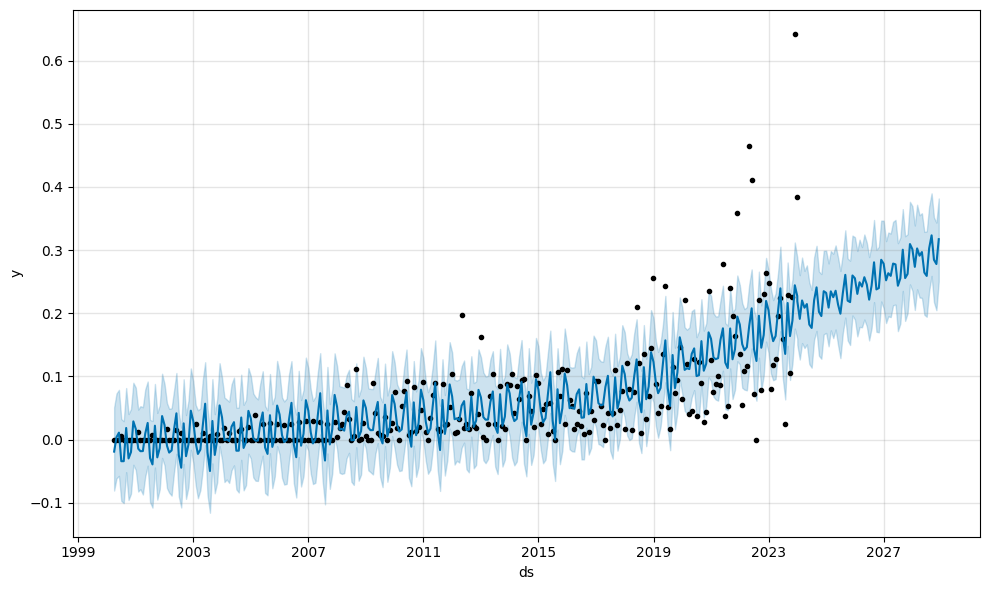

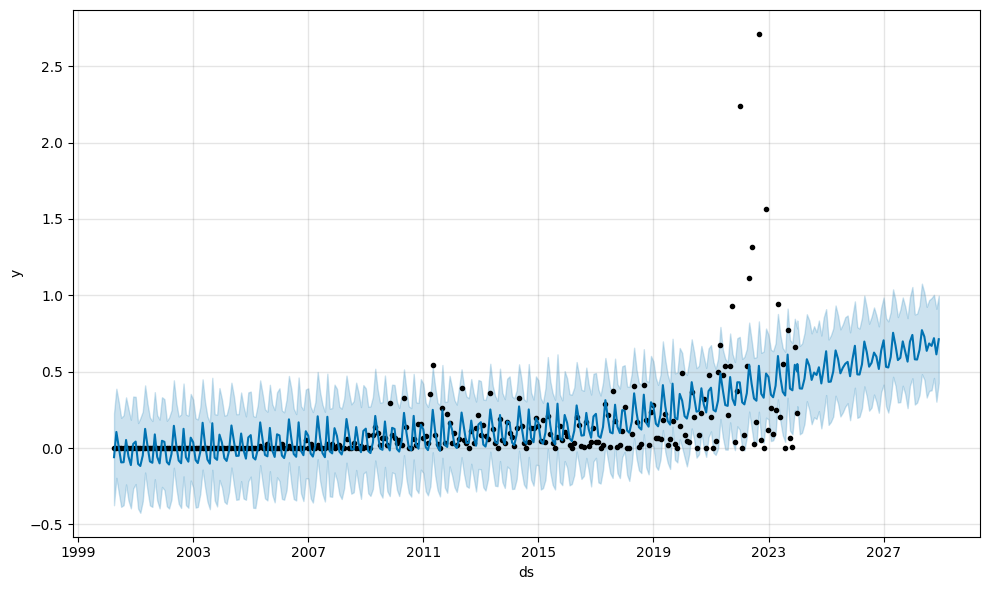

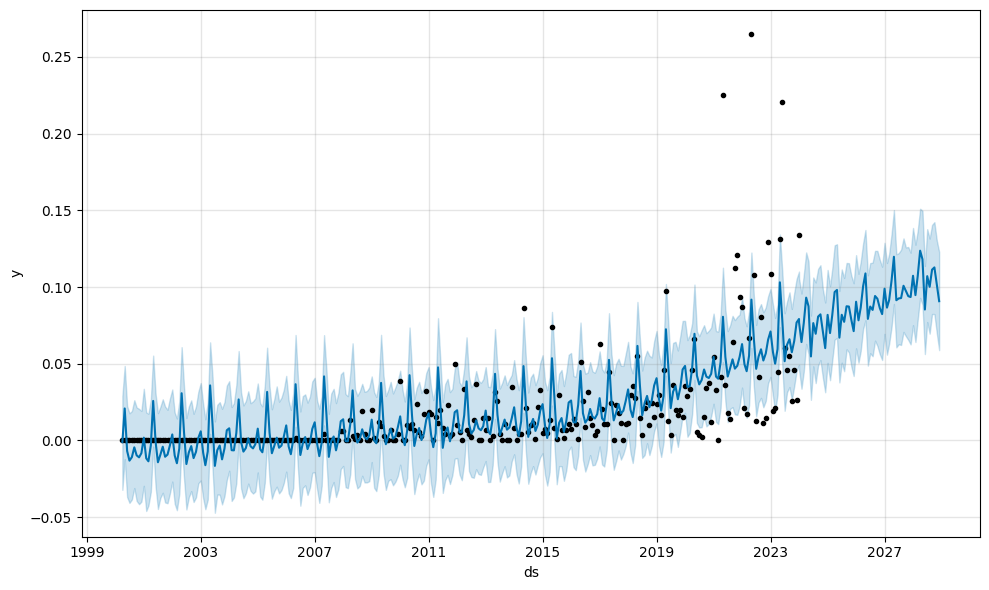

In [244]:
for model in ts_models:
    future = model.make_future_dataframe(periods=12 * 5, freq="MS")
    forecast = model.predict(future)
    model.plot(forecast)

### Previsão de dividendos para o próximo ano da EGIE3.SA

In [245]:
ticker = "VALE3.SA"

In [246]:
dividends_df = all_dividends[ticker].to_frame()
dividends_df

,VALE3.SA
Date,
2000-03-31 03:00:00+00:00,0.000000
2000-04-30 03:00:00+00:00,0.000000
2000-05-31 03:00:00+00:00,0.000000
2000-06-30 03:00:00+00:00,0.000000
2000-07-31 03:00:00+00:00,0.000000
...,...
2023-08-31 03:00:00+00:00,1.918472
2023-09-30 03:00:00+00:00,0.000000
2023-10-31 03:00:00+00:00,0.000000


In [247]:
total_dividend = dividends_df[ticker].to_numpy().sum()

payer_classification = cluster_model.predict(scaller.transform(total_dividend.reshape(-1, 1)))[0]
payer_classification

1

In [248]:
dividends_df.reset_index(inplace=True)
dividends_df.rename(columns={"Date": "ds", "EGIE3.SA": "y"}, inplace=True)
dividends_df["ds"] = pd.to_datetime(dividends_df["ds"], utc=True).dt.tz_convert(None)
dividends_df

,ds,VALE3.SA
0,2000-03-31 03:00:00,0.000000
1,2000-04-30 03:00:00,0.000000
2,2000-05-31 03:00:00,0.000000
3,2000-06-30 03:00:00,0.000000
4,2000-07-31 03:00:00,0.000000
...,...,...
281,2023-08-31 03:00:00,1.918472
282,2023-09-30 03:00:00,0.000000
283,2023-10-31 03:00:00,0.000000
284,2023-11-30 03:00:00,0.765771


In [249]:
model = ts_models[payer_classification]

future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

In [250]:
# Substituir os dividendos com valores negativos por 0
forecast.loc[forecast["yhat"] < 0, "yhat"] = 0
forecast = forecast[["ds", "yhat"]]
forecast

,ds,yhat
0,2000-03-31 03:00:00,0.000000
1,2000-04-30 03:00:00,0.105387
2,2000-05-31 03:00:00,0.004975
3,2000-06-30 03:00:00,0.000000
4,2000-07-31 03:00:00,0.000000
...,...,...
293,2024-08-31 03:00:00,0.581775
294,2024-09-30 03:00:00,0.477692
295,2024-10-31 03:00:00,0.423311
296,2024-11-30 03:00:00,0.563665


In [251]:
forecast.rename(columns={"ds": "Date", "yhat": ticker}, inplace=True)
forecast

,Date,VALE3.SA
0,2000-03-31 03:00:00,0.000000
1,2000-04-30 03:00:00,0.105387
2,2000-05-31 03:00:00,0.004975
3,2000-06-30 03:00:00,0.000000
4,2000-07-31 03:00:00,0.000000
...,...,...
293,2024-08-31 03:00:00,0.581775
294,2024-09-30 03:00:00,0.477692
295,2024-10-31 03:00:00,0.423311
296,2024-11-30 03:00:00,0.563665


# Cálculo do valor intrínseco

In [252]:
forecast_pcr_change = forecast.set_index("Date")

In [253]:
forecast_pcr_change = forecast_pcr_change.groupby(by=pd.Grouper(freq="Y")).sum()
forecast_pcr_change = forecast_pcr_change.pct_change()
forecast_pcr_change.dropna(inplace=True)
forecast_pcr_change

,VALE3.SA
Date,
2001-12-31,0.351248
2002-12-31,0.257461
2003-12-31,0.202710
2004-12-31,-0.065723
2005-12-31,0.183970
2006-12-31,0.163127
2007-12-31,0.149593
2008-12-31,0.010966
2009-12-31,0.126515


$$
P = \frac{D_1}{r - g}
$$

Onde,
- P = Valor intrínseco da empresa;
- D1 = Valor a ser pago em dividendos no próximo ano;
- r = Custo constante de capital próprio para a empresa (ou taxa de retorno). Nesse caso usaremos o [ROIC](https://statusinvest.com.br/termos/r/roic) como indicador, porém é possível utilizar outras métricas como por exemplo o WACC;
- g = Taxa constante de crescimento dos dividendos. Nesse modelo utilizamos a mediana do valor pago anualmente de dividendos até o ano atual e 1 ano no futuro (preditivo).
    
> Vale resaltar que as empresas classificados como "Dividendos Baixo" não são contempladas pelo modelo, pois podem ser empresas small caps ou apenas não pagam dividendos. Dessa forma, as empresas classificadas como "Dividendos Moderado" é utilizado o $r$ como o ROIC atual, já aqueles rotulados como "Dividendos Alto", o valor $r$ é o ROIC médio.

In [254]:
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
import time

driver = webdriver.Chrome()
driver.get(f"https://statusinvest.com.br/acoes/{ticker.replace('.SA', '')}")

roic_button = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located(
        (By.XPATH, r'//*[@id="indicators-section"]/div[2]/div/div[4]/div/div[3]/div/div/div/button'))
)
time.sleep(2)
roic_button.click()

average_roic_element = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.XPATH, r'//*[@id="main-modal"]/div[2]/div[1]/div/div[1]/div/div[1]/strong'))
)
average_roic = average_roic_element.text

currant_roic_element = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.XPATH, r'//*[@id="main-modal"]/div[2]/div[1]/div/div[1]/div/div[2]/strong'))
)
currant_roic = currant_roic_element.text

exit_roic_menu_button = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.XPATH, r'//*[@id="main-modal"]/div[1]/button'))
)
time.sleep(2)
exit_roic_menu_button.click()

ev_element = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.XPATH, r'/html/body/main/div[5]/div[1]/div/div[2]/div[8]/div/div/strong'))
)
ev = ev_element.text

number_of_shares_element = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.XPATH, r'/html/body/main/div[5]/div[1]/div/div[2]/div[9]/div/div/strong'))
)
number_of_shares = number_of_shares_element.text

driver.quit()

In [255]:
def parse(raw: str) -> float:
    return float(raw.split()[0].replace(".", "").replace(",", ".").replace("%", ""))


def get_classification_legend(classified_all_dividends_: pd.DataFrame):
    labels = ["Baixo", "Moderado", "Alto"]

    uniques = classified_all_dividends_["Classification"].unique().tolist()
    dividends = {}

    for classification_unique in uniques:
        dividend = classified_all_dividends_[classified_all_dividends_["Classification"] == classification_unique].iloc[0, 0]
        dividends.update({classification_unique: dividend})
    dividends = {key: value for key, value in sorted(dividends.items(), key=lambda item: item[1])}

    return {classification: labels[i] for i, classification in enumerate(dividends.keys())}


def get_classification_label_for(ticker: str, classified_all_dividends_: pd.DataFrame):
    legend = get_classification_legend(classified_all_dividends_)
    classification = classified_all_dividends_[classified_all_dividends_.index == ticker].iloc[0, -1]
    
    return legend[classification]


In [256]:
roic = parse(currant_roic) if get_classification_label_for(ticker, classified_all_dividends) == "Moderado" else parse(average_roic)
roic

13.57

In [264]:
def calculate_intrinsic_value():
    vi_current_roic = forecast.iloc[-12:, 1].sum() / (parse(currant_roic) / 100 - np.median(forecast_pcr_change))
    vi_average_roic = forecast.iloc[-12:, 1].sum() / (parse(average_roic) / 100 - np.median(forecast_pcr_change))
    vi_reference = parse(ev) / parse(number_of_shares)
    
    if round(vi_current_roic, 0) == round(vi_average_roic, 0):
        if vi_reference * 0.8 <= vi_current_roic <= vi_reference * 1.2:
            return vi_current_roic
        else:
            return 0
    
    if abs(vi_reference - vi_current_roic) > abs(vi_reference - vi_average_roic) and vi_reference * 0.8 <= vi_average_roic <= vi_reference * 1.2:
        return vi_average_roic
    elif 0.8 <= vi_current_roic <= vi_reference * 1.2:
        return vi_current_roic
    else:
        return 0
        

In [265]:
calculate_intrinsic_value()

80.92654159388823